LightCurveCollection of 15 objects:
    0: <KeplerLightCurve LABEL="KIC 11904151" QUARTER=0 CAMPAIGN=None>
    1: <KeplerLightCurve LABEL="KIC 11904151" QUARTER=1 CAMPAIGN=None>
    2: <KeplerLightCurve LABEL="KIC 11904151" QUARTER=2 CAMPAIGN=None>
    3: <KeplerLightCurve LABEL="KIC 11904151" QUARTER=3 CAMPAIGN=None>
    4: <KeplerLightCurve LABEL="KIC 11904151" QUARTER=4 CAMPAIGN=None>
    5: <KeplerLightCurve LABEL="KIC 11904151" QUARTER=5 CAMPAIGN=None>
    6: <KeplerLightCurve LABEL="KIC 11904151" QUARTER=6 CAMPAIGN=None>
    7: <KeplerLightCurve LABEL="KIC 11904151" QUARTER=7 CAMPAIGN=None>
    8: <KeplerLightCurve LABEL="KIC 11904151" QUARTER=9 CAMPAIGN=None>
    9: <KeplerLightCurve LABEL="KIC 11904151" QUARTER=10 CAMPAIGN=None>
    10: <KeplerLightCurve LABEL="KIC 11904151" QUARTER=11 CAMPAIGN=None>
    11: <KeplerLightCurve LABEL="KIC 11904151" QUARTER=13 CAMPAIGN=None>
    12: <KeplerLightCurve LABEL="KIC 11904151" QUARTER=14 CAMPAIGN=None>
    13: <KeplerLightCurve LABEL="K

(-0.3, 0.3)

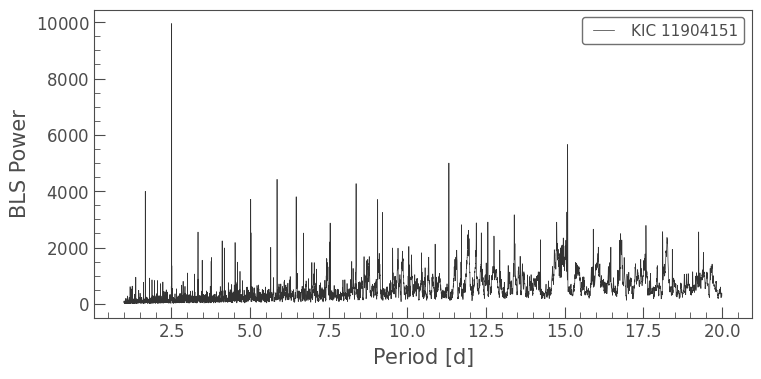

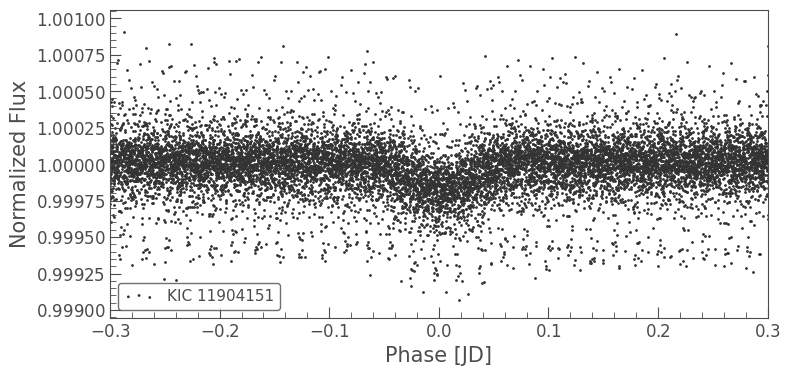

ERROR:bokeh.server.views.ws:Refusing websocket connection from Origin 'vscode-webview://0k4urvt5t6eospbgn3bev9atbntqn478rrb2va71f14s27tkn8bl';                       use --allow-websocket-origin=0k4urvt5t6eospbgn3bev9atbntqn478rrb2va71f14s27tkn8bl or set BOKEH_ALLOW_WS_ORIGIN=0k4urvt5t6eospbgn3bev9atbntqn478rrb2va71f14s27tkn8bl to permit this; currently we allow origins {'localhost:8888'}


In [ ]:
%matplotlib inline
import lightkurve as lk
import numpy as np

result = lk.search_targetpixelfile('Kepler-10', author='Kepler', cadence='long', limit=20)

tpf_collection = result.download_all()
# tpf_collection.plot()

lcs = []

for tpf in tpf_collection:
    lcs.append(tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask))

lc_collection = lk.LightCurveCollection(lcs)

print(lc_collection)

lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
# lc.plot()

lc.interact_bls()

# Create array of periods to search
period = np.linspace(1, 20, 10000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot()

planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

# Check the value for period
planet_b_period

ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
ax.set_xlim(-0.3, 0.3)



